# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
url='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ "4b52dddf08d1cc42f482e8c4b40530bc"


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=mitu
Processing Record 2 | Smoky Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=smoky lake
Processing Record 3 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=qaqortoq
Processing Record 4 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=upernavik
Processing Record 5 | Lovozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=lovozero
Processing Record 6 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=albany
Processing Record 7 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 58 | Dobson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=dobson
Processing Record 59 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=aksarka
Processing Record 60 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=east london
Processing Record 61 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=punta arenas
Processing Record 62 | Srivardhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=srivardhan
Processing Record 63 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=komsomolskiy
Processing Record 64 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc

Processing Record 113 | Parit Buntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=parit buntar
Processing Record 114 | Hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=hauterive
Processing Record 115 | Parakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=parakan
City not found. Skipping...
City not found. Skipping...
Processing Record 116 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=byron bay
Processing Record 117 | Honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=honiara
Processing Record 118 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=mandalgovi
Processing Record 119 | Bilma
http://api.openweathermap.org/da

Processing Record 168 | Mae Sai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=mae sai
City not found. Skipping...
Processing Record 169 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=tura
Processing Record 170 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=huarmey
Processing Record 171 | Silleda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=silleda
Processing Record 172 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=samarai
Processing Record 173 | Kuala Lipis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=kuala lipis
City not found. Skipping...
Processing Record 174 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?

Processing Record 223 | Xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=xichang
Processing Record 224 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=beyneu
Processing Record 225 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=karratha
Processing Record 226 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=xining
Processing Record 227 | Aksay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=aksay
Processing Record 228 | Srinivaspur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=srinivaspur
Processing Record 229 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=ost

Processing Record 279 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=salinopolis
Processing Record 280 | Kholmogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=kholmogory
Processing Record 281 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=talnakh
Processing Record 282 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=geraldton
Processing Record 283 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=cherskiy
Processing Record 284 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=berlevag
Processing Record 285 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482

Processing Record 335 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=saint-georges
Processing Record 336 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=batemans bay
Processing Record 337 | Simbahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=simbahan
City not found. Skipping...
Processing Record 338 | Valle de Allende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=valle de allende
Processing Record 339 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=okhotsk
Processing Record 340 | Panaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=panaba
Processing Record 341 | Ginir
http://api.openweathermap.org/data/2.5/weath

Processing Record 390 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=bredasdorp
Processing Record 391 | Chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=chegdomyn
Processing Record 392 | Laramie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=laramie
Processing Record 393 | Mugur-Aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=mugur-aksy
City not found. Skipping...
City not found. Skipping...
Processing Record 394 | Muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=muravlenko
City not found. Skipping...
Processing Record 395 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=sisimiut
Processing Record 396 | Tezu
http:

Processing Record 446 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=tilichiki
Processing Record 447 | Synya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=synya
Processing Record 448 | Rouvroy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=rouvroy
Processing Record 449 | Gallup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=gallup
Processing Record 450 | Colomi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=colomi
Processing Record 451 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=gat
Processing Record 452 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=vestmanna
Process

Processing Record 502 | Banff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=banff
Processing Record 503 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=vila velha
Processing Record 504 | Iracoubo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=iracoubo
Processing Record 505 | El Calvario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=el calvario
Processing Record 506 | Manyoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=manyoni
Processing Record 507 | Killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=killybegs
Processing Record 508 | Praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b405

Processing Record 557 | Bukachacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=bukachacha
Processing Record 558 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=constitucion
Processing Record 559 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=north bend
Processing Record 560 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=pacific grove
Processing Record 561 | General Cepeda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=general cepeda
City not found. Skipping...
Processing Record 562 | Caxias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b52dddf08d1cc42f482e8c4b40530bc&q=caxias
Processing Record 563 | Hattiesburg
http://api.openweathermap.org/da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_py= pd.DataFrame({
    "city_name": city_name,
    "cloudiness": cloudiness, 
    "country": country,
    "date": date, 
    "humidity": humidity,
    "lat":lat, 
    "lng":lng, 
    "max_temp": max_temp,
    "wind_speed":wind_speed
})

weather_py


,city_name,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Mitu,0,IR,1563039074,22,36.20,46.09,70.79,13.06
1,Smoky Lake,67,CA,1563039076,63,54.11,-112.47,75.00,6.51
2,Qaqortoq,40,GL,1563039077,42,60.72,-46.03,64.40,5.82
3,Upernavik,93,GL,1563039078,76,72.79,-56.15,45.95,9.73
4,Lovozero,68,RU,1563039079,82,68.01,35.02,48.47,9.17
5,Albany,75,US,1563039035,48,42.65,-73.75,84.99,6.93
6,Bluff,59,AU,1563038847,66,-23.58,149.07,51.71,8.63
7,Iqaluit,75,CA,1563039078,71,63.75,-68.52,55.40,5.82
8,Hobart,75,AU,1563039084,95,-42.88,147.33,44.01,8.05
9,Khatanga,12,RU,1563039085,70,71.98,102.47,49.91,6.15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

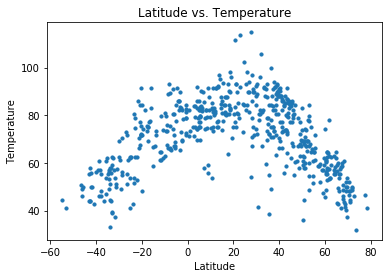

In [25]:
plt.scatter(weather_py['lat'],weather_py['max_temp'], marker='o', s=10)

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')



#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

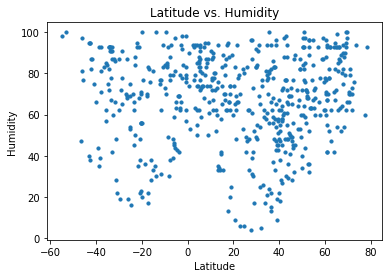

In [26]:
plt.scatter(weather_py['lat'],weather_py['humidity'], marker='o', s=10)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

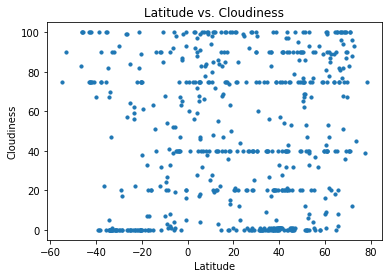

In [27]:
plt.scatter(weather_py['lat'],weather_py['cloudiness'], marker='o', s=10)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

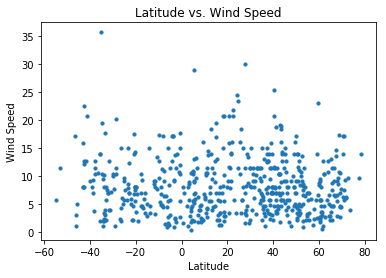

In [32]:
plt.scatter(weather_py['lat'],weather_py['wind_speed'], marker='o', s=10)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')